In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adadelta, Adam

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step 


In [3]:
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0  
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)

In [5]:
def train_model(optimizer, optimizer_name):
    # Define the model (Same as Task 1)
    model = Sequential([
        Dense(10, activation='softmax', input_shape=(784,))  
    ])

  
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

 
    history = model.fit(
        x_train, y_train,
        epochs=20,
        batch_size=128,  
        validation_data=(x_test, y_test),
        verbose=1
    )
    
    return history

In [6]:
history_adadelta = train_model(Adadelta(learning_rate=0.01), "AdaDelta")

history_adam = train_model(Adam(learning_rate=0.05), "Adam")

C:\Users\kavip\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0776 - loss: 2.3595 - val_accuracy: 0.2232 - val_loss: 2.1440
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2837 - loss: 2.0892 - val_accuracy: 0.4715 - val_loss: 1.8916
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5102 - loss: 1.8474 - val_accuracy: 0.6165 - val_loss: 1.6720
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6292 - loss: 1.6377 - val_accuracy: 0.6903 - val_loss: 1.4847
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6928 - loss: 1.4601 - val_accuracy: 0.7379 - val_loss: 1.3283
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7397 - loss: 1.3096 - val_accuracy: 0.7707 - val_loss: 1.1983
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7636 - loss: 1.1926 - val_accuracy: 0.7902 - val_loss: 1.0909
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7827 - loss: 1.0879 - val_accuracy: 0.

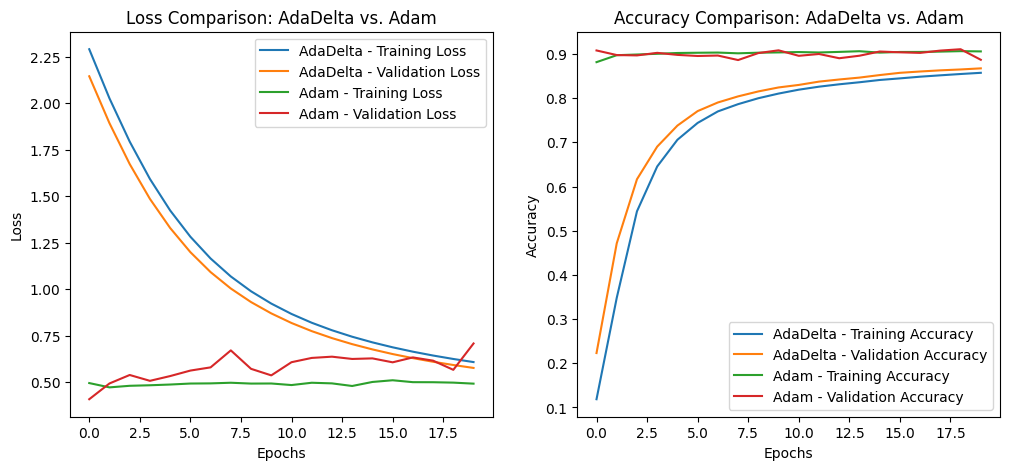

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_adadelta.history['loss'], label='AdaDelta - Training Loss')
plt.plot(history_adadelta.history['val_loss'], label='AdaDelta - Validation Loss')
plt.plot(history_adam.history['loss'], label='Adam - Training Loss')
plt.plot(history_adam.history['val_loss'], label='Adam - Validation Loss')
plt.title('Loss Comparison: AdaDelta vs. Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_adadelta.history['accuracy'], label='AdaDelta - Training Accuracy')
plt.plot(history_adadelta.history['val_accuracy'], label='AdaDelta - Validation Accuracy')
plt.plot(history_adam.history['accuracy'], label='Adam - Training Accuracy')
plt.plot(history_adam.history['val_accuracy'], label='Adam - Validation Accuracy')
plt.title('Accuracy Comparison: AdaDelta vs. Adam')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()